In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import datetime 
import matplotlib.pyplot as plt



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<h1>Ask</h1>



<h1>Data</h1>

The data comes from a legitimate source that's provided by the company Cyclistic.  No personal information of user is compromised or shown.  The data is exported from the dataset provided on kaggle.

In [3]:
#Import CSV files

Jan_2021 = pd.read_csv('../input/bikeset/202101-divvy-tripdata.csv')
Feb_2021 = pd.read_csv('../input/bikeset/202102-divvy-tripdata.csv')
March_2021 = pd.read_csv('../input/bikeset/202103-divvy-tripdata.csv')
April_2021 = pd.read_csv('../input/bikeset/202104-divvy-tripdata.csv')
May_2021 = pd.read_csv('../input/bikeset/202105-divvy-tripdata.csv')
June_2021 = pd.read_csv('../input/bikeset/202106-divvy-tripdata.csv')
July_2021 = pd.read_csv('../input/bikeset/202107-divvy-tripdata.csv')
Aug_2021 = pd.read_csv('../input/bikeset/202108-divvy-tripdata.csv')
Sep_2021 = pd.read_csv('../input/bikeset/202109-divvy-tripdata.csv')
Oct_2021 = pd.read_csv('../input/bikeset/202110-divvy-tripdata.csv')
Nov_2021 = pd.read_csv('../input/bikeset/202111-divvy-tripdata.csv')
Dec_2021 = pd.read_csv('../input/bikeset/202112-divvy-tripdata.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../input/bikeset/202101-divvy-tripdata.csv'

In [ ]:
#Combine all CSV files into one dataset

bike_data = pd.concat([Jan_2021, Feb_2021, March_2021, April_2021, May_2021, June_2021, July_2021, Aug_2021, Sep_2021, Oct_2021, Nov_2021, Dec_2021], ignore_index = True)
print(bike_data)






                  ride_id  rideable_type           started_at  \
0        E19E6F1B8D4C42ED  electric_bike  2021-01-23 16:14:19   
1        DC88F20C2C55F27F  electric_bike  2021-01-27 18:43:08   
2        EC45C94683FE3F27  electric_bike  2021-01-21 22:35:54   
3        4FA453A75AE377DB  electric_bike  2021-01-07 13:31:13   
4        BE5E8EB4E7263A0B  electric_bike  2021-01-23 02:24:02   
...                   ...            ...                  ...   
5595058  847431F3D5353AB7  electric_bike  2021-12-12 13:36:55   
5595059  CF407BBC3B9FAD63  electric_bike  2021-12-06 19:37:50   
5595060  60BB69EBF5440E92  electric_bike  2021-12-02 08:57:04   
5595061  C414F654A28635B8  electric_bike  2021-12-13 09:00:26   
5595062  37AC57E34B2E7E97   classic_bike  2021-12-13 08:45:32   

                    ended_at           start_station_name start_station_id  \
0        2021-01-23 16:24:44   California Ave & Cortez St            17660   
1        2021-01-27 18:47:12   California Ave & Cortez St      

In [ ]:
bike_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


In [ ]:
#drop Null values
bike_data = bike_data.dropna(how='any',axis=0)

In [ ]:
# drop all rows with NAN values 
bike_data.dropna(inplace= True)

In [ ]:
bike_data.isnull().sum()

In [ ]:
bike_data.drop(['start_station_name', 'end_station_name', 'start_station_id', 'end_station_id', 'start_lat', 'end_lat','start_lng','end_lng'],axis='columns')

In [ ]:
# changing the 'started_at' and 'ended_at' dtype to datetime
bike_data['started_at']= pd.to_datetime(bike_data.started_at)
bike_data['ended_at']= pd.to_datetime(bike_data.ended_at)

In [ ]:
# splitting and extracting the date from the 'started_at' column
bike_data['started_at'] = bike_data.started_at
bike_data.start_date.head()

0   2021-01-23 16:14:19
1   2021-01-27 18:43:08
2   2021-01-21 22:35:54
3   2021-01-07 13:31:13
4   2021-01-23 02:24:02
Name: start_date, dtype: datetime64[ns]

In [ ]:
# converting 'day_of_week' into a datetime dtype
bike_data['days_of_week']= pd.to_datetime(bike_data.started_at)
bike_data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_date            datetime64[ns]
days_of_week          datetime64[ns]
dtype: object

NameError: name 'days_of_week' is not defined

In [ ]:
# finding the weekday of the date 
bike_data['day_name'] = bike_data['started_at'].dt.day_name()
bike_data['day_name'].unique()


array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [ ]:
bike_data['day_name'] = pd.to_datetime(bike_data['day_name'])


KeyError: 'day_name'

In [ ]:
bike_data.info()

In [ ]:
#Get ride length of data
bike_data['ride_length'] = bike_data['ended_at'] - bike_data['started_at']
bike_data['ride_length']

73670     0 days 00:10:34
78336     0 days 00:06:15
39961     0 days 00:19:41
34046     0 days 00:07:53
33916     0 days 00:00:12
                ...      
5479239   0 days 00:48:35
5479240   0 days 00:48:22
5395111   0 days 00:33:07
5399809   0 days 00:21:29
5448258   0 days 00:14:54
Name: ride_length, Length: 5595063, dtype: timedelta64[ns]

In [ ]:
bike_data.index = bike_data['start_date']
bike_data.info()

In [ ]:
# changing day_name to  categorical dtype
#bike_data['day_name']= bike_data.day_name.astype('category')
#bike_data.info()


In [ ]:
bike_data['day_name'] = bike_data['started_at'].dt.day_name()
bike_data['day_name'].unique()


In [ ]:
#Create new column for month and year
bike_data['year'] = pd.DatetimeIndex(bike_data['start_date']).year
bike_data['month'] = pd.DatetimeIndex(bike_data['start_date']).month
print(bike_data)

In [ ]:
#calculate the mean of ride length of all types of users (Needs revising)
bike_data.ride_length.describe(datetime_is_numeric=True)

In [ ]:
# filtered the negative values
negative_duration = bike_data['ride_length'] < '00:00:00'
# showing the number of negative time duration
bike_data[negative_duration].count()

In [ ]:
# removing the negative duration
bike_data.drop(bike_data[negative_duration].index, inplace=True)



In [ ]:
# filtering the ride length for members
member_filter = bike_data['member_casual'] == 'member'
bike_data[member_filter].ride_length.describe()

In [ ]:
# sort the dataframe by ascending using start date
bike_data.sort_values(by=['started_at'], inplace= True, ascending= True)

In [ ]:
# calculate the no. of rides by users in a week by adding Count of ride_id to values
count_users = bike_data.groupby('day_name')['ride_id'].count()
count_users = count_users.sort_index()
count_users

day_name
Friday       810508
Monday       702588
Saturday     991047
Sunday       857285
Thursday     737588
Tuesday      739905
Wednesday    756142
Name: ride_id, dtype: int64

In [ ]:
# calculate the no. of rides by members in a week
count_members = bike_data[bike_data['member_casual'] == 'member'].groupby('day_name')['ride_id'].count()
count_members

day_name
Friday       446428
Monday       416212
Saturday     433047
Sunday       376142
Thursday     451524
Tuesday      465513
Wednesday    477192
Name: ride_id, dtype: int64

In [ ]:
# calculate the no. of rides by casual riders in a week
count_casual = bike_data[bike_data['member_casual'] == 'casual'].groupby('day_name')['ride_id'].count()
count_casual

day_name
Friday       364080
Monday       286376
Saturday     558000
Sunday       481143
Thursday     286064
Tuesday      274392
Wednesday    278950
Name: ride_id, dtype: int64

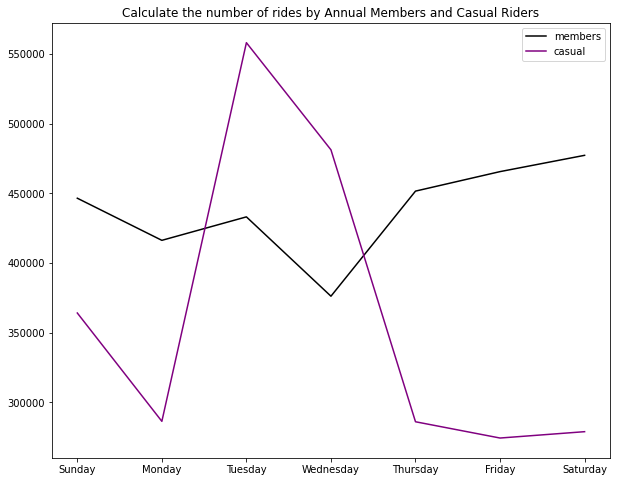

In [ ]:
#DATA VISUALIZATION 

# plot the graph for number of rides by casual riders and annual members 
plt.figure(figsize = (10,8))
plt.plot(count_members.index, count_members.values, color="black")
plt.plot(count_casual.index, count_casual.values, color="purple")
plt.title('Calculate the number of rides by Annual Members and Casual Riders')
plt.legend(['members', 'casual'])
labels = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(count_casual.index, labels)
plt.show()

In [ ]:
# calculate the average ride length for all users in a week
user_avg_rides = bike_data.groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_rides

day_name
Friday      0 days 00:20:58.300338799
Monday      0 days 00:20:50.400399665
Saturday    0 days 00:26:12.642935198
Sunday      0 days 00:27:56.953633855
Thursday    0 days 00:18:33.923176624
Tuesday     0 days 00:18:25.134849744
Wednesday   0 days 00:18:17.542444408
Name: ride_length, dtype: timedelta64[ns]

In [ ]:
# calculate the average ride length for members in a week
user_avg_members = bike_data[bike_data['member_casual'] == 'member'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_members

day_name
Friday      0 days 00:13:19.485428781
Monday      0 days 00:13:14.836198860
Saturday    0 days 00:15:15.861204442
Sunday      0 days 00:15:39.270318124
Thursday    0 days 00:12:46.564082972
Tuesday     0 days 00:12:47.280000773
Wednesday   0 days 00:12:49.084446092
Name: ride_length, dtype: timedelta64[ns]

In [ ]:
# calculate the average ride length for casual_riders in a week
user_avg_casual = bike_data[bike_data['member_casual'] == 'casual'].groupby('day_name')['ride_length'].mean(numeric_only=False)
user_avg_casual 

In [ ]:
# plot the average ride_length for different users during the week
plt.figure(figsize = (10,6))
plt.plot(user_avg_members/pd.Timedelta(minutes=1), color="black")
plt.plot(user_avg_casual/pd.Timedelta(minutes=1), color="purple")
plt.title('The average ride duration for both user types during the week')
plt.legend(['members', 'casual'])
labels = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(user_avg_members.index, labels)
plt.show

NameError: name 'user_avg_members' is not defined

<Figure size 720x432 with 0 Axes>

In [ ]:
# check the number of users in each type over the past 12 months
user_types = bike_data['member_casual'].value_counts()
user_types

In [ ]:
# To check the amount of users for a particular ride_type
ride_type = bike_data.groupby('member_casual')['rideable_type'].value_counts()
ride_type

In [ ]:
#Remove Docked Bike riders as the dataset is too small and irrelevant

bike_data.drop(row['member.docked_bike'],axis='row')

In [ ]:
# to segregate the number of users into members and casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))
    

In [ ]:
# to plot the number of users into members and casual riders based on rider type
plt.figure(figsize=(12,8))
sns.barplot(list_x, list_y, hue=list_member)
plt.title('Member and Casual riders over the months based on ride_type')
plt.tick_params(axis='x',)



In [ ]:
# to segregate the number of users into members and casual riders based on ride type
list_member = []
list_x = []
list_y = list(ride_type.values)
for i, j in ride_type.index:
    list_x.append(j)
    list_member.append(str(i))
    

In [ ]:
# to get the total amount of users in each category per month
users_over_month = bike_data.groupby('month')['member_casual'].value_counts()
users_over_month

In [ ]:
#to seggregate the number of users into members and casual over months
list_month = []
list_x = []
list_y = (users_over_month.values)
for i, j in users_over_month.index:
    list_x.append(j)
    list_month.append(str(i))

In [ ]:
# plot count of members and casual riders
plt.figure(figsize= (15,7))
sns.barplot(list_x, list_y, hue =list_month)
plt.title('Count of member and casual riders over the months')

In [ ]:
# calculate the median of week-day of members
median_week_day_member = bike_data[bike_data['member_casual'] == 'member']
median_week_day_member = median_week_day_member['day_name'].median()
median_week_day_member

<h1>How do annual and casual riders use cyclistic bikes differerently?</h1>

